# Zadatak 4

1. Generisati po $𝑁 = 500$ dvodimenzionih odbiraka iz četiri klase koje će biti linearno separabilne. Preporuka je da to budu Gausovski raspodeljeni dvodimenzioni oblici. Izabrati jednu od metoda za klasterizaciju (c mean metod, metod kvadratne dekompozicije) i primeniti je na formirane uzorke klasa. Izvršiti analizu osetljivosti izabranog algoritma na početnu klasterizaciju kao i srednji broj potrebnih iteracija. Takođe izvršiti analize slučaja kada se apriorno ne poznaje broj klasa. 

2. Na odbircima iz prethodne tačke izabrati jednu od metoda klasterizacije (metod maksimalne verodostojnosti ili metod grana i granica) i primeniti je na formirane uzorke klasa. Izvršiti analizu osetljivosti izabranog algoritma na početnu klasterizaciju kao i srednji broj potrebnih iteracija. Takođe izvršiti analize slučaja kada se apriorno ne poznaje broj klasa. 

3. Generisati po $N = 500$ dvodimenzionih odbiraka iz dve klase koje su nelinearno separabilne. Izabrati jednu od metoda za klasterizaciju koje su primenjive za nelinearno separabilne klase (metod kvadratne dekompozicije ili metod maksimalne verodostojnosti) i ponoviti analizu iz prethodnih tačaka.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## 1. C mean metoda

Osobine algoritma:
- Broj klastera se mora unapred znati
- Početna klasterizacija se može izvršiti totalno stohastički
- Deli prostor bisektrisama na podprostore, ne vodi računa o kovarijansama klastera
- Ne garantuje globalni optimum
- Ne garantuje stabilnost konvergencije

Cilje je minimizovati kriterijumsku funkciju $J= tr(S_m^{-1}S_w)$. Pokazuje se da se ovaj izraz svodi na: $$J = \frac{1}{N} \sum_{i=1}^{L}\sum_{j=1}^{N_i}||X_j^{(i)} - M_i||^2$$ ukoliko se izvrši beljenje, odnosno važi $S_m = I$. Ovaj izraz će biti minimalan kada su svi odbirci smešteni u najbliži klaster po euklidskom rastojanju.

Algoritam vrši klasifikaciju na osnovu priraštaja kriterijumske funkcije:$$\Delta J(i,j,l) = ||X_i - M_j(l)||^2 - ||X_i - M_{X_i}(l)||^2$$

Koraci:
1. inicijalizacij $l=0$
2. napravimo početnu inicijalizaciju $\Omega (0)$ koja može biti potpuno nasumična
3. Procenimo vektor matematičkog očekivanja za svaku od kalsa
4. Svaki od odbiraka na osnovu priraštaja kriterijumske funckije $\Delta J(i,j,l)$ reklasifikujemo u odgovarajuću klasu - tražimo klasu koja daje najnegativniji priraštaj funkcije i tu kalsu proglašavamo novom za naš odbirak.
5. Ažuriramo l na l+1
6. Provera da li se algoritam završava tako što proverimo da li je došlo do bar jedne reklasifikacije. Ukoliko nije algoritam se završava

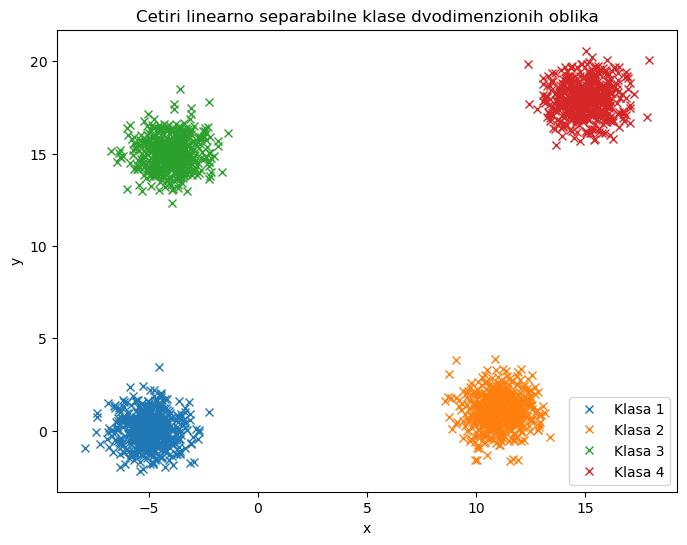

In [62]:
M1 = np.array([-5, 0]).reshape(-1,1)      
M2 = np.array([11, 1]).reshape(-1,1)
M3 = np.array([-4, 15]).reshape(-1,1)
M4 = np.array([15, 18]).reshape(-1,1)

S = np.array([[0.8, 0], [0, 0.8]])
S1 = S2 = S3 = S4 = S

N=500
np.random.seed(42)
X1 = np.random.multivariate_normal(M1.reshape(-1), S, N).T
X2 = np.random.multivariate_normal(M2.reshape(-1), S, N).T
X3 = np.random.multivariate_normal(M3.reshape(-1), S, N).T
X4 = np.random.multivariate_normal(M4.reshape(-1), S, N).T

plt.figure(figsize=(8, 6))
plt.plot(X1[0,:], X1[1,:], 'x', label='Klasa 1')
plt.plot(X2[0,:], X2[1,:], 'x', label='Klasa 2')
plt.plot(X3[0,:], X3[1,:], 'x', label='Klasa 3')
plt.plot(X4[0,:], X4[1,:], 'x', label='Klasa 4')
plt.legend()
plt.title("Cetiri linearno separabilne klase dvodimenzionih oblika")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Pocetna klasterizacija

In [63]:
def pocetna_klasterizacija(klasteri, L=4):
    my_data = np.concatenate(klasteri, axis=1)
    random_class = np.random.randint(0, L, my_data.shape[1])
    
    initial_clusters = [[] for i in range(L)]
    for i, c in enumerate(random_class):
        initial_clusters[c].append(my_data[:, i].reshape(-1,1))
        
    initial_clusters = [np.concatenate(cluster, axis=1) for cluster in initial_clusters]

    return initial_clusters

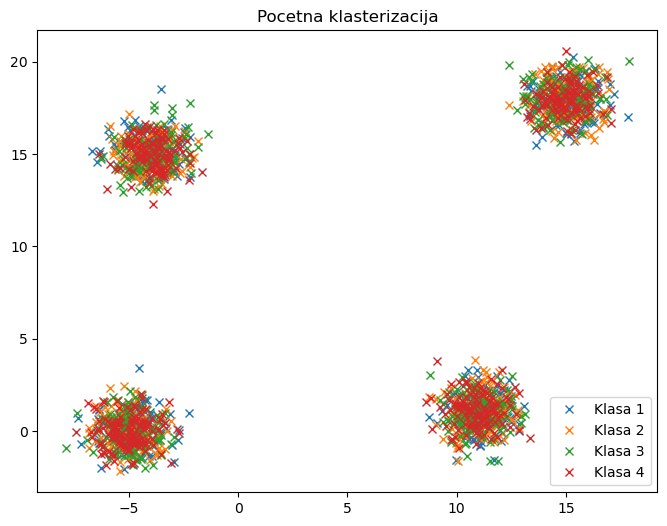

In [64]:
klasteri = [X1, X2, X3, X4]
poc_klas = pocetna_klasterizacija(klasteri)
cnt = 1
plt.figure(figsize=(8, 6))
for klaster in poc_klas:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Pocetna klasterizacija')
plt.legend()
plt.show()

### Cmean algoritam

In [65]:
def Cmean(klasteri, lmax=100):
    l = 1
    reklas = True  
    centroidi = [np.mean(klaster, axis=1).reshape(-1, 1) for klaster in klasteri]
    my_data = np.concatenate(klasteri, axis=1)
    klase = np.zeros(my_data.shape[1], dtype=int)
    
    while l <= lmax and reklas:
        novi_klasteri = [[] for i in range(len(centroidi))]
        reklas = False
         
        d = np.array([np.sum((my_data - centroid)**2, axis=0) for centroid in centroidi])
        nove_klase = np.argmin(d, axis=0)
        for i, c in enumerate(nove_klase):
            novi_klasteri[c].append(my_data[:, i])
            if c != klase[i]:
                reklas = True           
        klase = nove_klase.copy()
        
        klasteri = []
        pom = []
        
        for klaster in novi_klasteri:
            if klaster:
                klasteri.append(np.array(klaster).T)
            else:
                random_point = my_data[:, np.random.randint(my_data.shape[1])].reshape(-1, 1)
                pom.append(random_point)
                klasteri.append(random_point)
                
        for point in pom:
            next_point = False
            for klaster in klasteri:
                if (point in klaster) and (klaster.shape[1]>1):
                    klaster = klaster[klaster != point]
                    break
                
        
        centroidi_pom = []
        for klaster, centroid in zip(klasteri, centroidi):
             if klaster.shape[1] > 0:
                centroidi_pom.append(np.mean(klaster, axis=1).reshape(-1, 1))
             else:
                centroidi_pom.append(np.zeros_like(centroid))
        centroidi = centroidi_pom.copy()

        l += 1

    return klasteri, l

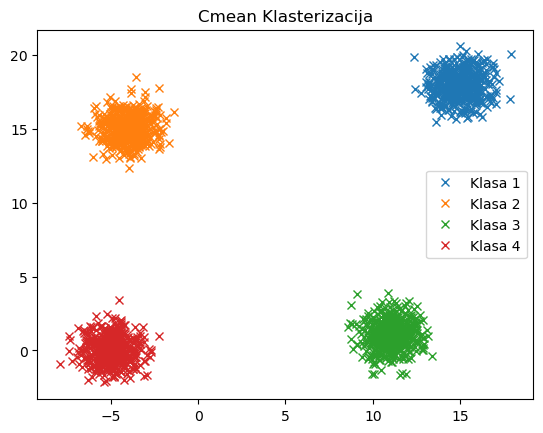

In [66]:
lu = 0
klasteri, l = Cmean(poc_klas, lmax=100)
cnt =1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Cmean Klasterizacija')
plt.legend()
plt.show()
lu += l

### Testiranje na pocetnu klasterizaciju

Ponovićemo ovaj eksperiment još tri puta, tako ćemo videti kako Cmean radi na primeru ukupno 4 nasumične početne klasifikacije.

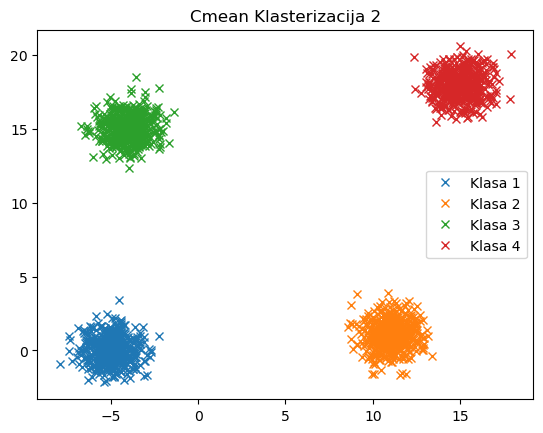

In [67]:
poc_klas = pocetna_klasterizacija(klasteri)
klasteri, l = Cmean(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Cmean Klasterizacija 2')
plt.legend()
plt.show()
lu += l

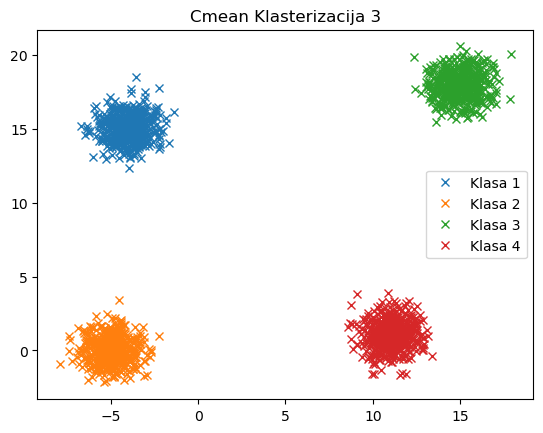

In [68]:
poc_klas = pocetna_klasterizacija(klasteri)
klasteri, l = Cmean(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Cmean Klasterizacija 3')
plt.legend()
plt.show()
lu += l

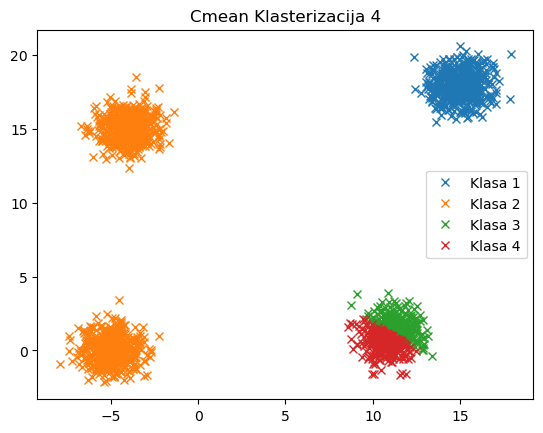

In [74]:
poc_klas = pocetna_klasterizacija(klasteri)
cnt = 1
klasteri, l = Cmean(poc_klas, lmax=100)
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Cmean Klasterizacija 4')
plt.legend()
plt.show()
lu += l

In [70]:
print(f'Srednji broj potrebnih iteracija je {lu/5}')

Srednji broj potrebnih iteracija je 3.2


U većini slučajeva Cmean daje zadovoljavajuću klasterizaciju, međutim u jednom slučaju nije data adekvatna klasterizacija, ovo ilustruje osobinu algoritma da neće uvek konvergirati ka globalno najboljem rešenju.

### Bez apriornog zanja klasa.
Ovde ćemo pokazati klasifikacije kada pretpostavljamo da imamo 2, 3, 5 i 6 klasa.

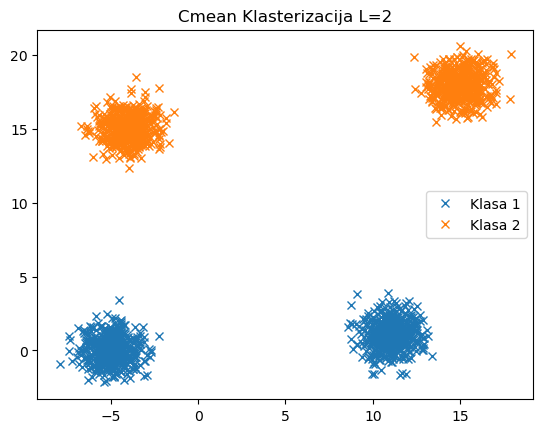

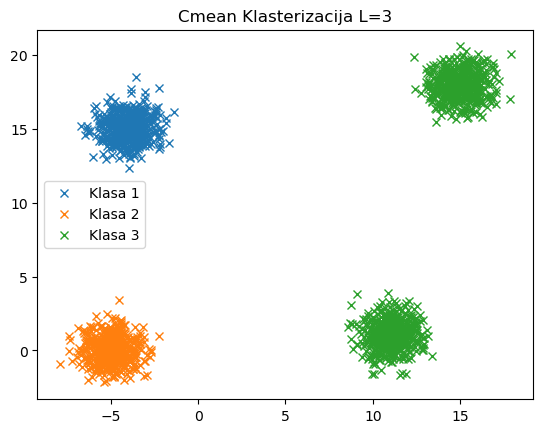

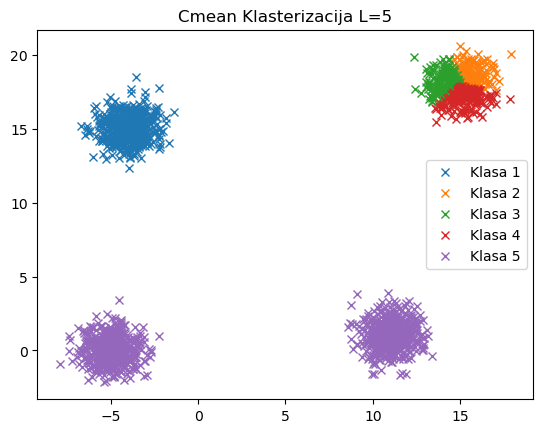

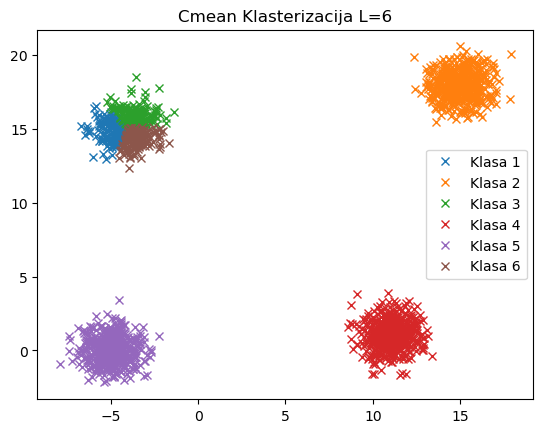

In [75]:
Ls = [2, 3, 5, 6]

for L in Ls:
    poc_klas = pocetna_klasterizacija(klasteri, L)
    klasteri, l = Cmean(poc_klas, lmax=100)
    cnt = 1
    for klaster in klasteri:
        if klaster.shape[1] > 0:
            plt.figure(L)
            plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
            cnt += 1
    plt.title(f'Cmean Klasterizacija L={L}')
    plt.legend()
    plt.show()

## 2. Maximum Likelihood metoda

U ovoj metodi uvodimo pretpostavku da naši odbirci stižu iz raspodele koja se može podelovati kao zbir L gausovskih raspodela, koje su opisane aprironom verovatnoćom $P_i$, vektorom matematičkog očekivanja $M_i$ i kovarijacionom matricom $\Sigma_i$.

Potrebno je maksimizovati kriterijumsku funkciju: $$J = \max_{P_i, M_i, \Sigma_i}f(X_1, X_2, ... , X_N)$$

Metod se bazira na  rešavnanju sledećih jednačina:
$$q_i(X_j) = \frac{P_i \cdot f_i(X_j)}{f(X_j)}$$

$$P_i = \frac{1}{N} \sum_{j=1}^Nq_i(X_j)$$

$$M_i = \frac{1}{N_i}\sum_{j=1}^{N_i}q_i(X_j) \cdot X_j$$

$$\Sigma_i = \frac{1}{N_i} \sum_{j=1}^{N_i} q_i(X_j) \cdot (X_j-M_i)(X_j-M_i)^T$$

Mešutim ove jednačine nije moguće rešiti u zatvorenoj formi, pa se primenjuje iterativni postupak.

Koraci algoritma:
1. Inicijalizacija l=0

2. Zadamo inicijalnu klasterizaciju $\Omega(0)$ i procenimo $P_i(0)$, $M_i(0)$, $\Sigma_i(0)$

3. Na osnovu jednačine izračunamo $q_i^{(l)}(X_j)$

4. Na osnovu ostalih jednačina dobijamo vrednosti za $P_i(l)$, $M_i(l)$, $\Sigma_i(l)$

5. l = l + 1

6. Ponovo iz prve jednačine sračunamo $q_i^{(l+1)}(X_j)$

7. Tražimo $max(|q_i^{(l)}(X_j) - q_i^{(l-1)}(X_j)|)$, ukoliko je veći od $\Delta$ idemo u Korak 4, u suprotnom je kraj algoritma.

Odluka za $X_j$:  $max(q_i(X_j)) = q_t(X_j) \implies X_j \in \omega_t$

In [84]:
def MaximumLikelihood(clusters, delta=0.001, lmax=100):
    l = 0
    max_dif = 2*delta
    my_data = np.concatenate(clusters, axis=1)

    P = [cluster.shape[1]/my_data.shape[1] for cluster in clusters]
    M = [np.mean(cluster, axis=1).reshape(-1, 1) for cluster in clusters]
    S = [np.cov(cluster) for cluster in clusters]

    fi = [[] for i in range(len(clusters))]
    for i in range(len(clusters)):
        for j in range(my_data.shape[1]):
            fi[i].append(gaussian_pdf(my_data[:,j].reshape(-1,1), M[i], S[i]))

    f = [poly_gaussian_pdf(my_data[:,i].reshape(-1,1),P,M,S) for i in range(my_data.shape[1])]

    q = [[] for i in range(len(clusters))]    
    for i in range(len(clusters)):
        for j in range(my_data.shape[1]):
            q[i].append(P[i]*fi[i][j]/f[j])

    while(max_dif > delta and l<lmax):
        P = [sum(q[i])/len(q[i]) for i in range(len(clusters))]

        M = []
        for i in range(len(clusters)):
            pom = np.zeros((2,1))
            for j in range(my_data.shape[1]):
                pom += q[i][j]*my_data[:, j].reshape(-1,1)
            pom = pom / (my_data.shape[1] * P[i])
            M.append(pom)

        S = []
        for i in range(len(clusters)):
            pom = np.zeros((2,2))
            for j in range(my_data.shape[1]):
                pom += q[i][j]*(my_data[:, j].reshape(-1,1) - M[i])@(my_data[:, j].reshape(-1,1) - M[i]).T
            pom = pom / (my_data.shape[1] * P[i])
            S.append(pom)

        l += 1

        fi = [[] for i in range(len(clusters))]
        for i in range(len(clusters)):
            for j in range(my_data.shape[1]):
                fi[i].append(gaussian_pdf(my_data[:,j].reshape(-1,1), M[i], S[i]))

        f = [poly_gaussian_pdf(my_data[:,i].reshape(-1,1),P,M,S) for i in range(my_data.shape[1])]

        q_new = [[] for i in range(len(clusters))]    
        for i in range(len(clusters)):
            for j in range(my_data.shape[1]):
                q_new[i].append(P[i]*fi[i][j]/f[j])

        substracted = []
        for i in range(len(q_new)):
            for j in range(len(q_new[i])):
                substracted.append(np.abs(q_new[i][j] - q[i][j]))

        max_dif = max(substracted)
        q = q_new.copy()
        
    result = [max(range(len(q)), key=lambda i: col[i]) for col in zip(*q)]
    final_clust = [[] for i in range(len(clusters))]
    for i, elem in enumerate(result):
        final_clust[elem].append(my_data[:, i])
    for i in range(len(final_clust)):
        final_clust[i] = np.array(final_clust[i]).T
        
    return final_clust, lmax

### Analiza osetljivosti na početnu klasterizaciju

Izvršićemo 4 različite početne klasterizacije i ilustrovati finalnu klasterizaciju. Na osnovu ovoga ćemo i proceniti prosečan broj potrebnih iteracija.

In [85]:
lu = 0
k = [X1, X2, X3, X4]

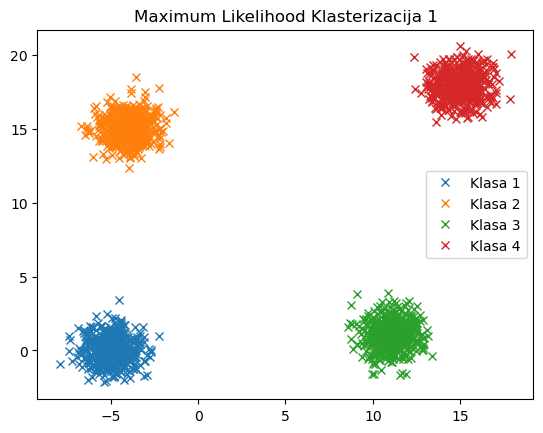

In [86]:
poc_klas = pocetna_klasterizacija(k)
klasteri, l = MaximumLikelihood(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Maximum Likelihood Klasterizacija 1')
plt.legend()
plt.show()
lu += l

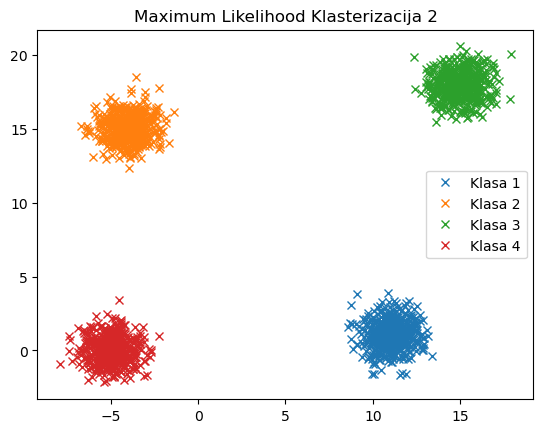

In [87]:
poc_klas = pocetna_klasterizacija(k)
klasteri, l = MaximumLikelihood(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Maximum Likelihood Klasterizacija 2')
plt.legend()
plt.show()
lu += l

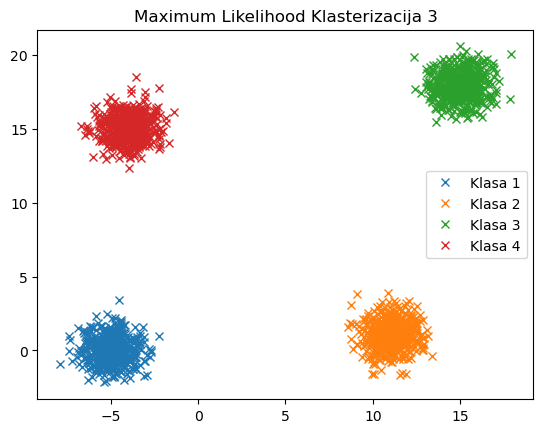

In [93]:
poc_klas = pocetna_klasterizacija(k)
klasteri, l = MaximumLikelihood(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Maximum Likelihood Klasterizacija 3')
plt.legend()
plt.show()
lu += l

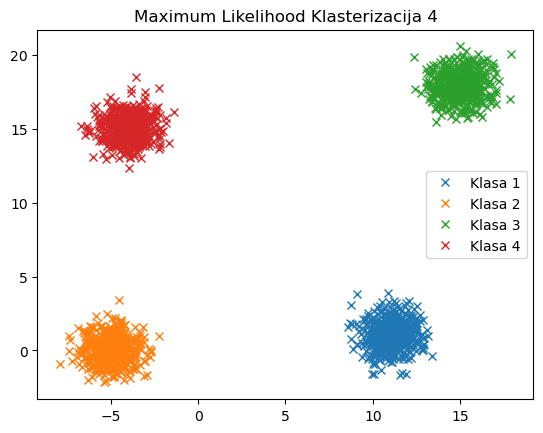

In [94]:
poc_klas = pocetna_klasterizacija(k)
klasteri, l = MaximumLikelihood(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Maximum Likelihood Klasterizacija 4')
plt.legend()
plt.show()
lu += l

In [92]:
print(f'Srednji broj potrebnih iteracija je {lu/5}')

Srednji broj potrebnih iteracija je 80.0


Sada je klasterizacija uvek adekvatna, međutim potreban nam je znatno veći broj iteracija nego kod C mean algoritma

### Bez apriornog znanja o broju kalsa

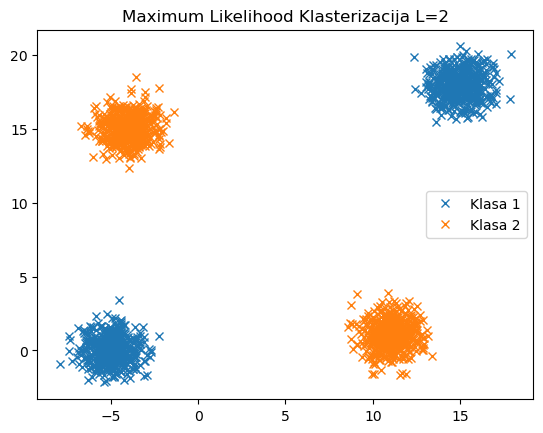

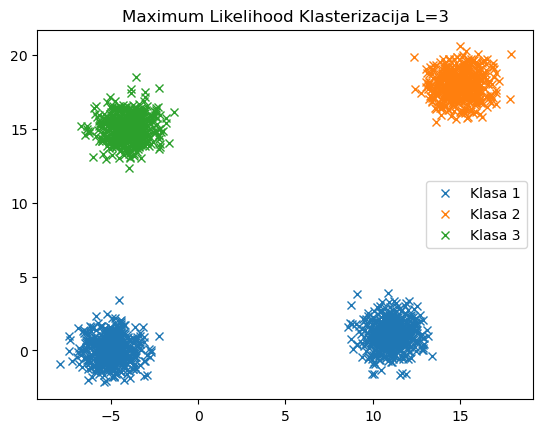

In [95]:
Ls = [2, 3]

for L in Ls:
    poc_klas = pocetna_klasterizacija(k, L)
    klasteri, l = MaximumLikelihood(poc_klas, lmax=100)
    cnt = 1
    for klaster in klasteri:
        if klaster.shape[1] > 0:
            plt.figure(L)
            plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
            cnt += 1
    plt.title(f'Maximum Likelihood Klasterizacija L={L}')
    plt.legend()
    plt.show()

## 3. Nelinearno separabilne klase - Kvadratna dekompozicija

Algoritam je analogan Cmean algoritmu sa jedinom razlikom što se distanca sada računa kao: $$d = \frac{1}{2} \cdot (X_i - M_j)^T \Sigma_j^{-1} (X_i - M_j) + \frac{1}{2} ln|\Sigma_j| - \frac{1}{2} ln|P_j|$$

Kod ovog algoritma potpuno stohastička inicijalizacija nije moguća, već je potrebno uneti neko predznanje u inicijalnu klasterizaciju.

In [96]:
def kvadratna_dekompozicija(clusters, lmax=100, output=False):

    l = 1
    flag = True  
    my_data = np.concatenate(clusters, axis=1)
    assigned_class = np.zeros(my_data.shape[1], dtype=int)
    centroids = [np.mean(cluster, axis=1).reshape(-1, 1) for cluster in clusters]
    S = [np.cov(cluster) for cluster in clusters]
    P = [cluster.shape[1]/my_data.shape[1] for cluster in clusters]
    

    
    while l <= lmax and flag:
        
        new_clusters = [[] for i in range(len(centroids))]
        flag = False
        
        d = np.zeros((len(centroids), my_data.shape[1]))
        
        for i in range(len(centroids)):
            for j in range(my_data.shape[1]):
                dist = 0.5*(my_data[:,j].reshape(-1,1)-centroids[i]).T @ np.linalg.inv(S[i]) @ (my_data[:,j].reshape(-1,1)-centroids[i]) + 0.5*np.log(np.linalg.det(S[i])) - 0.5*np.log(P[i])
                d[i,j] = dist[0,0]
                
        nxt_classes = np.argmin(d, axis=0)
        
        for i, c in enumerate(nxt_classes):
            new_clusters[c].append(my_data[:, i])
            if c != assigned_class[i]:
                flag = True           
        assigned_class = nxt_classes.copy()
        
        clusters = []
        random_points = []
        
        for elem in new_clusters:
            if elem:
                clusters.append(np.array(elem).T)
            else:
                random_point = my_data[:, np.random.randint(my_data.shape[1])].reshape(-1, 1)
                random_points.append(random_point)
                clusters.append(random_point)
                
        for point in random_points:
            next_point = False
            for cluster in clusters:
                if (point in cluster) and (cluster.shape[1]>1):
                    cluster = cluster[cluster != point]
                    break
                
        
        centroids_pom = []
        for cluster, centroid in zip(clusters, centroids):
             if cluster.shape[1] > 0:
                centroids_pom.append(np.mean(cluster, axis=1).reshape(-1, 1))
             else:
                centroids_pom.append(np.zeros_like(centroid))
        centroids = centroids_pom.copy()
        
        S_pom = []
        for cluster, sigma in zip(clusters, S):
             if cluster.shape[1] > 0:
                S_pom.append(np.cov(cluster))
             else:
                S_pom.append(np.zeros_like(sigma))
        S = S_pom.copy()
        
        if output:
            plot_clusters(clusters, title=f"Iteracija broj: {l}")
            print(f"Pretisni ENTER za narednu iteracije...")
            input()

        l += 1
        
    if output:
        print("Kraj klasterizacije")

    return clusters, l
    

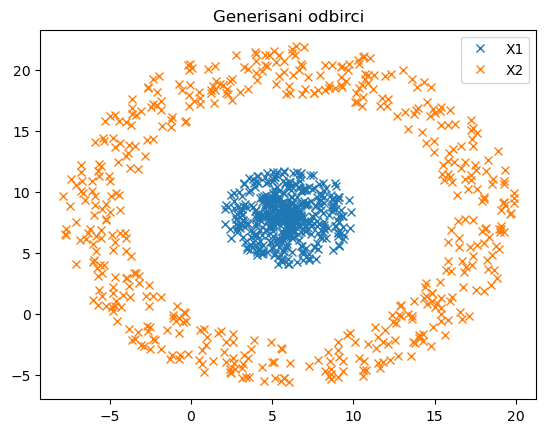

In [122]:
N = 500

C = np.array([6,8]).reshape(2,1)
R = 4*np.random.rand(1,N)
Teta = 2 * np.pi * np.random.rand(1,N)
X11 = R*np.cos(Teta)
X12 = R*np.sin(Teta)
X1 = np.concatenate((X11,X12), axis=0) + C

C = np.array([6,8]).reshape(2,1)
R = 10 + 4 * np.random.rand(1,N)
Teta = 2*np.pi * np.random.rand(1,N)
X21 = R*np.cos(Teta)
X22 = R*np.sin(Teta)
X2 = np.concatenate((X21,X22), axis=0) + C

plt.figure()
plt.plot(X1[0, :], X1[1, :], 'x')
plt.plot(X2[0, :], X2[1, :], 'x')
plt.legend(['X1', 'X2'])
plt.title('Generisani odbirci')

k = [X1, X2]

### Osetljivost na pocetnu klasterizaciju

In [111]:
lu = 0

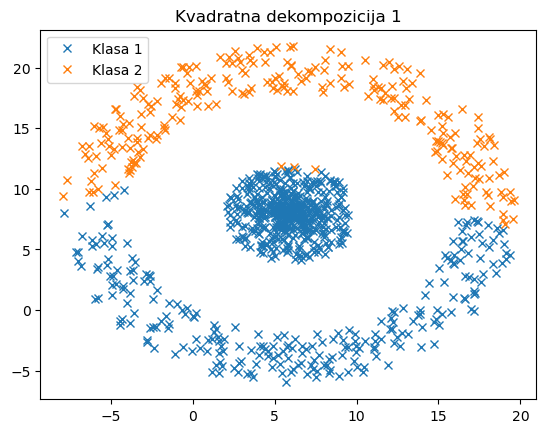

In [112]:
poc_klas = pocetna_klasterizacija(k, L=2)
klasteri, l = kvadratna_dekompozicija(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Kvadratna dekompozicija 1')
plt.legend()
plt.show()
lu += l

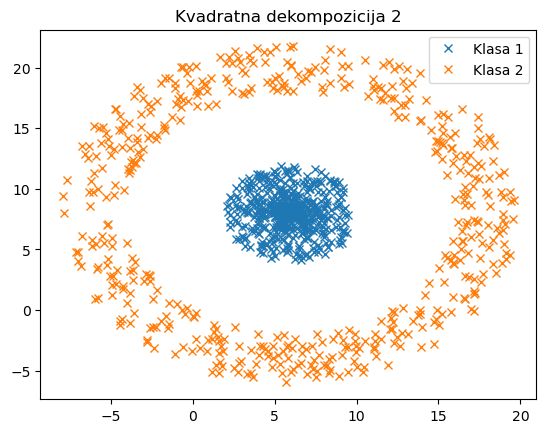

In [113]:
poc_klas = pocetna_klasterizacija(k, L=2)
klasteri, l = kvadratna_dekompozicija(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Kvadratna dekompozicija 2')
plt.legend()
plt.show()
lu += l

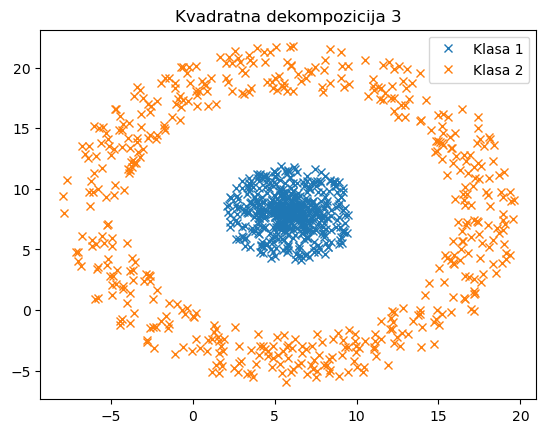

In [114]:
poc_klas = pocetna_klasterizacija(k, L=2)
klasteri, l = kvadratna_dekompozicija(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Kvadratna dekompozicija 3')
plt.legend()
plt.show()
lu += l

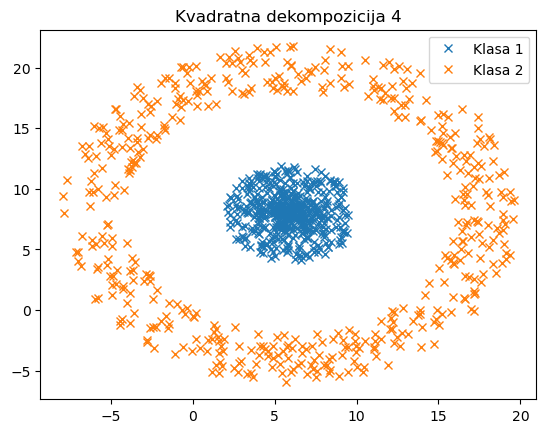

In [115]:
poc_klas = pocetna_klasterizacija(k, L=2)
klasteri, l = kvadratna_dekompozicija(poc_klas, lmax=100)
cnt = 1
for klaster in klasteri:
    if klaster.shape[1] > 0:
        plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
        cnt += 1
plt.title('Kvadratna dekompozicija 4')
plt.legend()
plt.show()
lu += l

In [116]:
print(f'Srednji broj potrebnih iteracija je {lu/5}')

Srednji broj potrebnih iteracija je 12.0


Vidimo da kvadratna dekompozicija ne daje dobar rezultat. To je zato što je ova metoda osetljiva na početnu klasterizaciju. Izvršićemo ovaj algoritam još 10 puta da vidimo da li ćemo dobiti bolje rezultate.

Sada ćemo analizirati slučaj kada neko predznanje unesemo u inicijalnu klasterizaciju

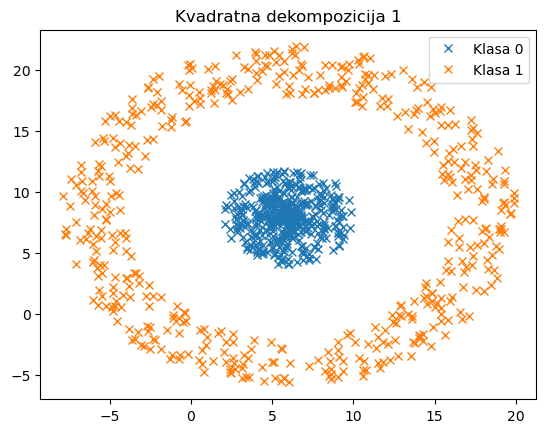

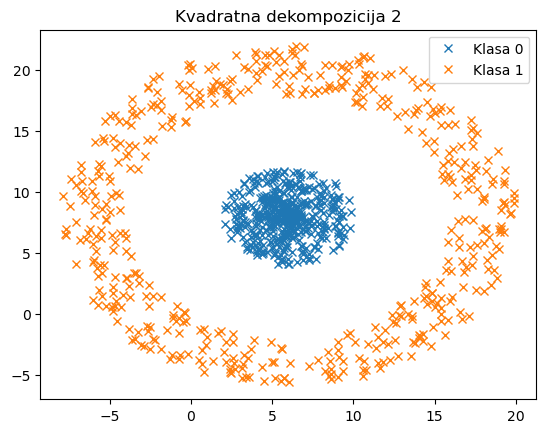

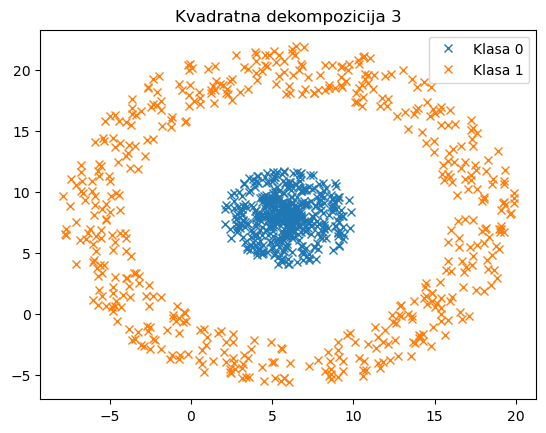

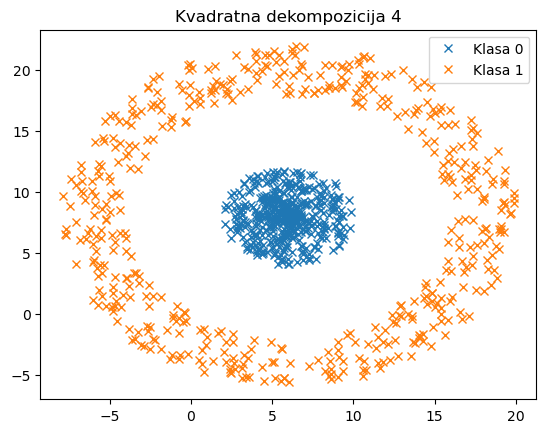

Srednji broj potrebnih iteracija je 3.25


In [124]:
l_sum = 0
m = 4

for i in range(m):
    original_clusters = [X1[:,100:], X2[:,100:]]
    initial_clusters = pocetna_klasterizacija(original_clusters, 2)
    initial_clusters[0] = np.concatenate((X1[:,0:100], initial_clusters[0]), axis=1)
    initial_clusters[1] = np.concatenate((X2[:,0:100], initial_clusters[1]), axis=1)
    klasteri, l = kvadratna_dekompozicija(initial_clusters)
    cnt = 0
    for klaster in klasteri:
        if klaster.shape[1] > 0:
            plt.plot(klaster[0, :], klaster[1, :], 'x', label=f"Klasa {cnt}")
            cnt += 1
    plt.title(f'Kvadratna dekompozicija {i+1}')
    plt.legend()
    plt.show()
    l_sum += l

print(f"Srednji broj potrebnih iteracija je {l_sum/m}")

Zaključujemo da kvadratna dekompozicija dosta bolje konvergira kada se u početnu klasterizaciju uključi neko apriorno znanje.